<a href="https://www.kaggle.com/code/janadarwish/spectral-clustering?scriptVersionId=262379996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

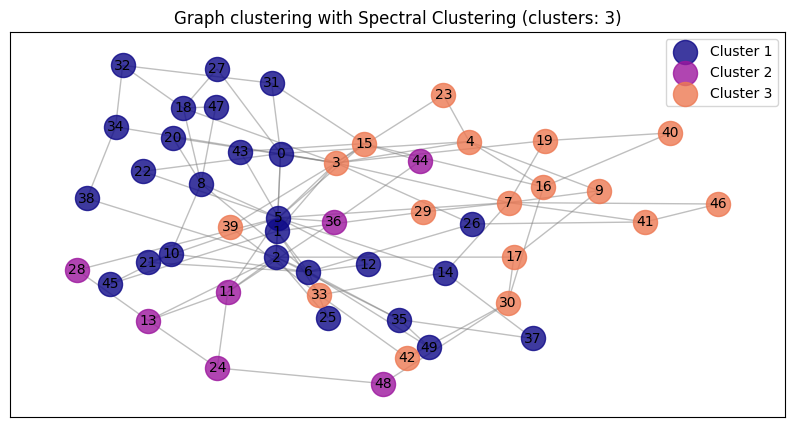

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralClustering 

data, rows, columns = make_checkerboard(
    shape=(30, 30),     #hagm el matrix 
    n_clusters=(3, 3),  #3adad el moraba3at
    noise=0.1,          #bnhot noise 3shan mtkonsh perfect
    random_state=42
)

def visualize_spectral_clustering(graph, num_clusters):
    adjacency_matrix = nx.to_numpy_array(graph)

    spectral_clustering = SpectralClustering(
        n_clusters=num_clusters,
        affinity='precomputed',
        random_state=42
    )
    labels = spectral_clustering.fit_predict(adjacency_matrix)

    pos = nx.spring_layout(graph, seed=42)

    colors = plt.colormaps["plasma"]

    plt.figure(figsize=(10, 5))
    for cluster in range(num_clusters):
        cluster_nodes = [list(graph.nodes())[i] for i in range(len(labels)) if labels[i] == cluster]

        nx.draw_networkx_nodes(
            graph, pos,
            nodelist=cluster_nodes,
            node_color=[colors(cluster / num_clusters)],
            label=f"Cluster {cluster+1}",
            node_size=300, alpha=0.8
        )

    nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5)
    nx.draw_networkx_labels(graph, pos, font_size=10)

    plt.title(f"Graph clustering with Spectral Clustering (clusters: {num_clusters})")
    plt.legend()
    plt.show()

G = nx.barabasi_albert_graph(n=50, m=2)
visualize_spectral_clustering(G, num_clusters=3)

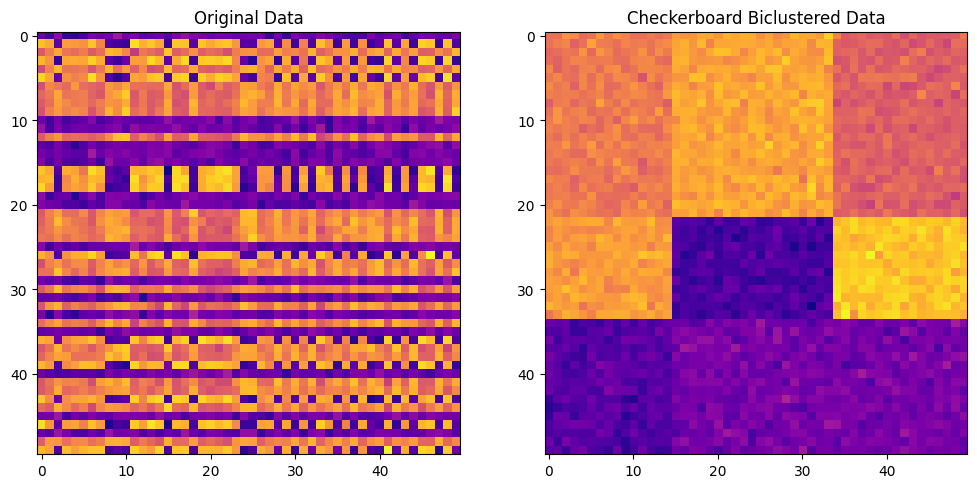

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering
from sklearn.datasets import make_checkerboard

n_rows, n_cols = 50, 50
data, rows, columns = make_checkerboard(shape=(n_rows, n_cols),
                                        n_clusters=(3, 3),
                                        noise=5,
                                        shuffle=True,
                                        random_state=42)

model = SpectralBiclustering(n_clusters=(3, 3), method='log', random_state=42)
model.fit(data)

data_reordered = data[np.argsort(model.row_labels_), :][:, np.argsort(model.column_labels_)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data, cmap=plt.cm.plasma)

plt.subplot(1, 2, 2)
plt.title("Checkerboard Biclustered Data")
plt.imshow(data_reordered, cmap=plt.cm.plasma)

plt.show()
